In [13]:
# 6
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
import pandas as pd

data = pd.read_csv("heart.csv")

print(data.head())

model = BayesianNetwork([
  ("age","target"),
  ("sex","target"),
  ("exang","target"),
  ("cp","target"),
  ("target","chol"),
])

print(data["age"].unique())
print(data["chol"].unique())

model.fit(data,estimator=MaximumLikelihoodEstimator)
infer = VariableElimination(model)

q = infer.query(variables=["target"],evidence={"age":37})
qq = infer.query(variables=["target"],evidence={"chol":250})
print(q)
print(qq)

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope   
0   63    1   3       145   233    1        0      150      0      2.3      0  \
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
[63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
[233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221

c:\Users\Amaan M k\anaconda3\envs\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Amaan M k\anaconda3\envs\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'Gausian Mixture')

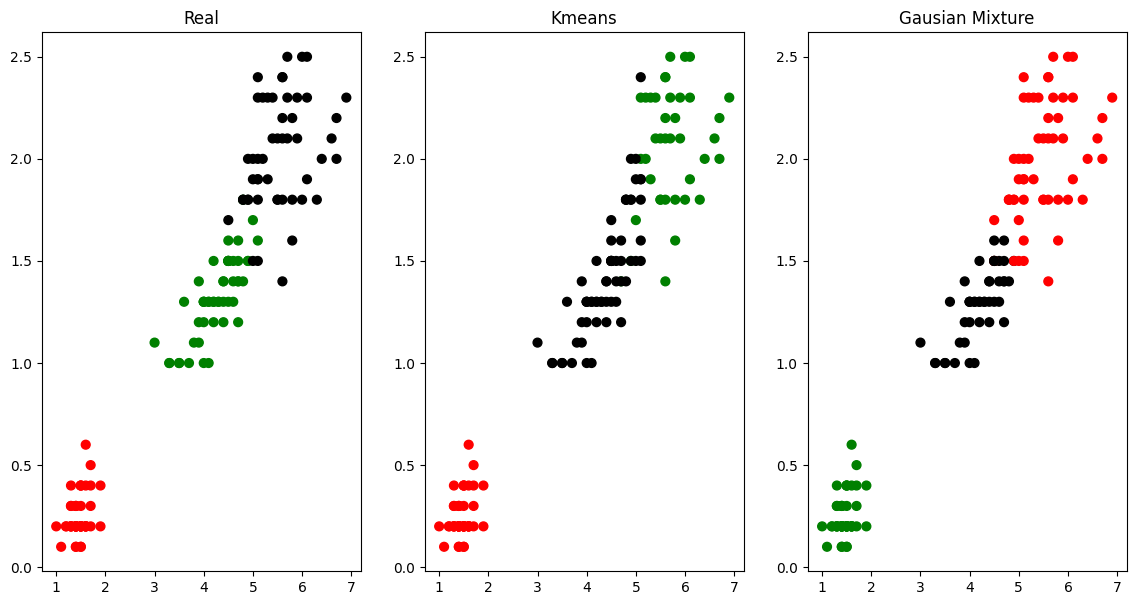

In [38]:
# 7 
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

dataset = load_iris()
x=dataset.data
y=dataset.target
X1,X2 = x[:,2],x[:,3]

colormap = np.array(["red","green","black"])

plt.figure(figsize= (14, 7))

plt.subplot(1,3,1)
plt.scatter(X1,X2,c=colormap[y],s=40)
plt.title("Real")

plt.subplot(1,3,2)
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)
plt.scatter(X1,X2,c=colormap[kmeans.labels_],s=40)
plt.title("Kmeans")

plt.subplot(1,3,3)
gmm = GaussianMixture(n_components=3)
gmm.fit(x)
y_pred = gmm.predict(x)
plt.scatter(X1,X2,c=colormap[y_pred],s=40)
plt.title("Gausian Mixture")

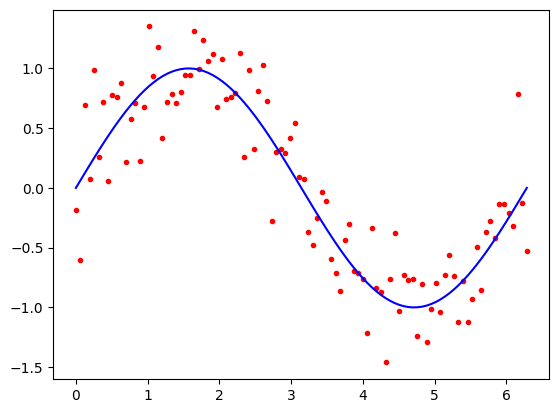

In [45]:
import numpy as np

n =100
x=np.linspace(0, np.pi*2, n)
y=np.sin(x) + 0.3 * np.random.randn(n)
plt.plot(x,y,"r.")

y_pred = np.sin(x)
plt.plot(x,y_pred,"b-")